# **Load Dataset**

In [1]:
import pandas as pd

# Load the Titanic dataset
titanic_data_path = '/content/drive/MyDrive/Titanic-Dataset.csv'
titanic_df = pd.read_csv(titanic_data_path)

# Display the first few rows of the dataset to understand its structure
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Data Pre-processing**

In [2]:
# Check for null values in each column
missing_values = titanic_df.isnull().sum()

# Display the null values
missing_values


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
# Handle null values
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('Unknown')
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Check again for null values to confirm changes
missing_values_after = titanic_df.isnull().sum()

# Display the updated null values count to confirm changes
missing_values_after


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# **Data Visualization**

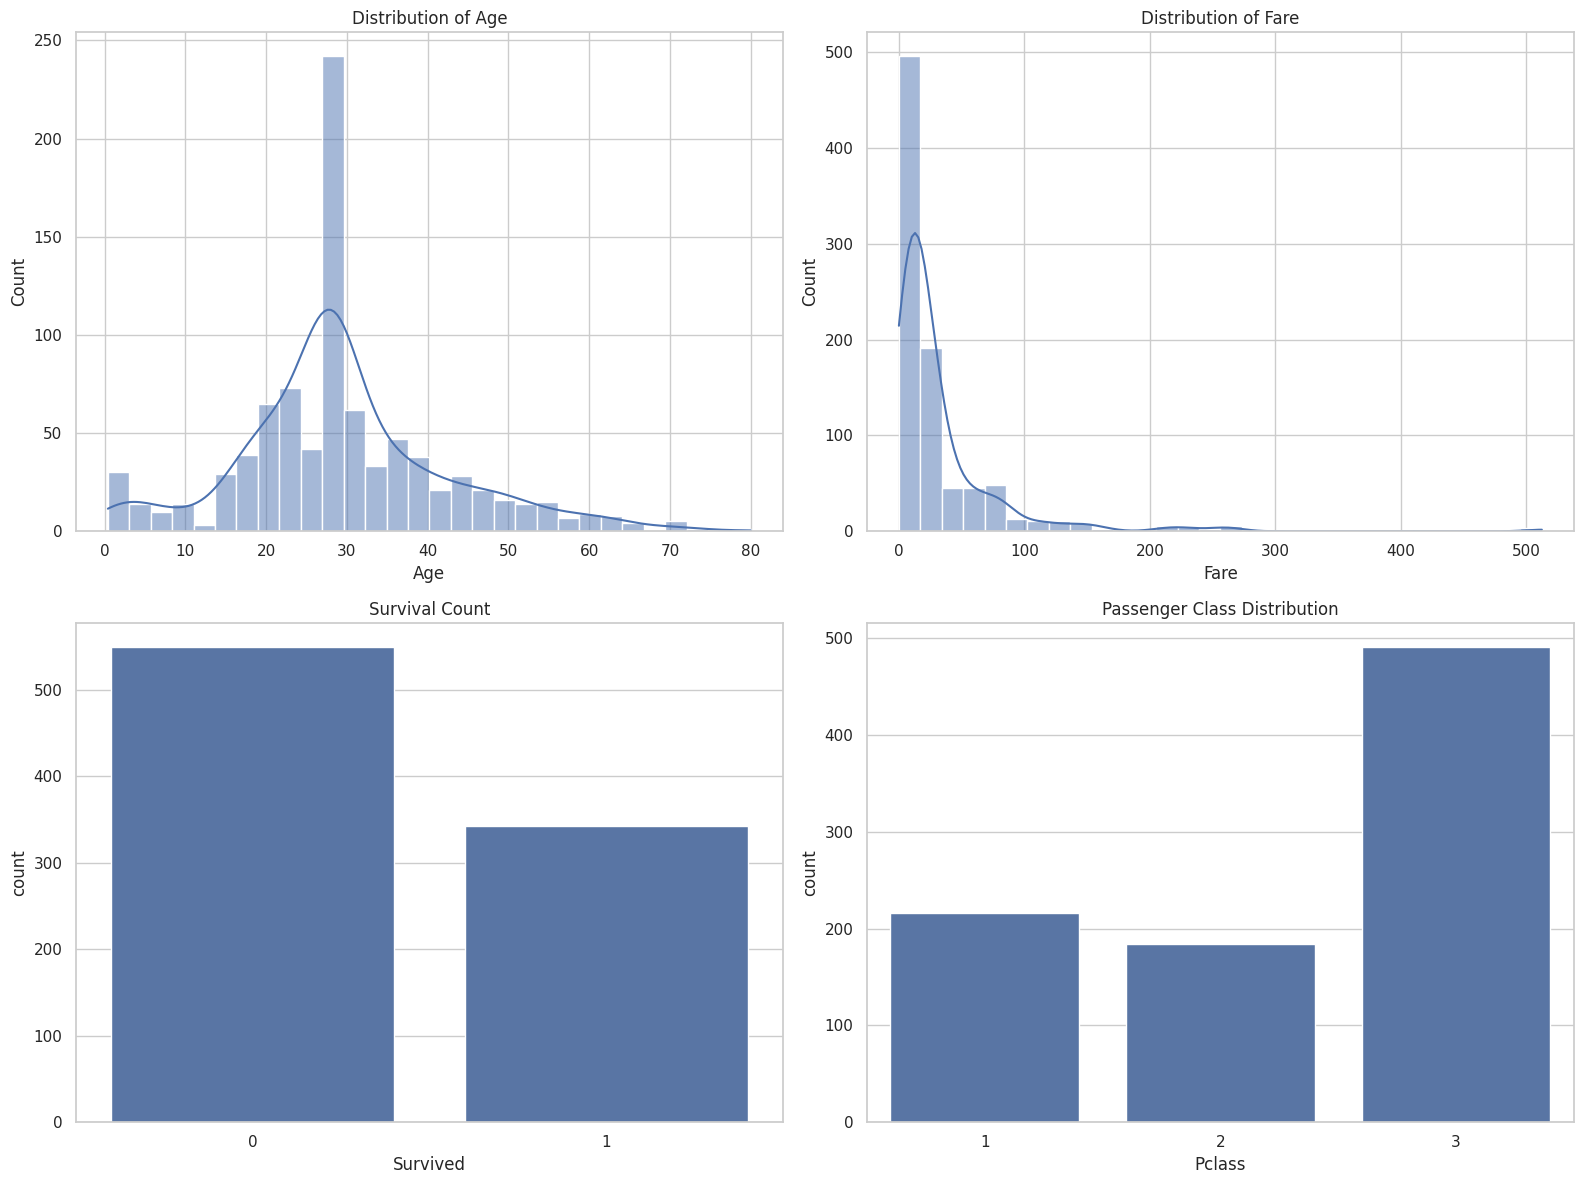

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Summary statistics for numeric columns
summary_statistics = titanic_df.describe()

# Plotting distributions of key numeric variables
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# Distribution of Ages
sns.histplot(titanic_df['Age'], bins=30, kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Age')

# Distribution of Fare
sns.histplot(titanic_df['Fare'], bins=30, kde=True, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Fare')

# Survival count
sns.countplot(x='Survived', data=titanic_df, ax=ax[1, 0])
ax[1, 0].set_title('Survival Count')

# Passenger class distribution
sns.countplot(x='Pclass', data=titanic_df, ax=ax[1, 1])
ax[1, 1].set_title('Passenger Class Distribution')

plt.tight_layout()
plt.show()

summary_statistics


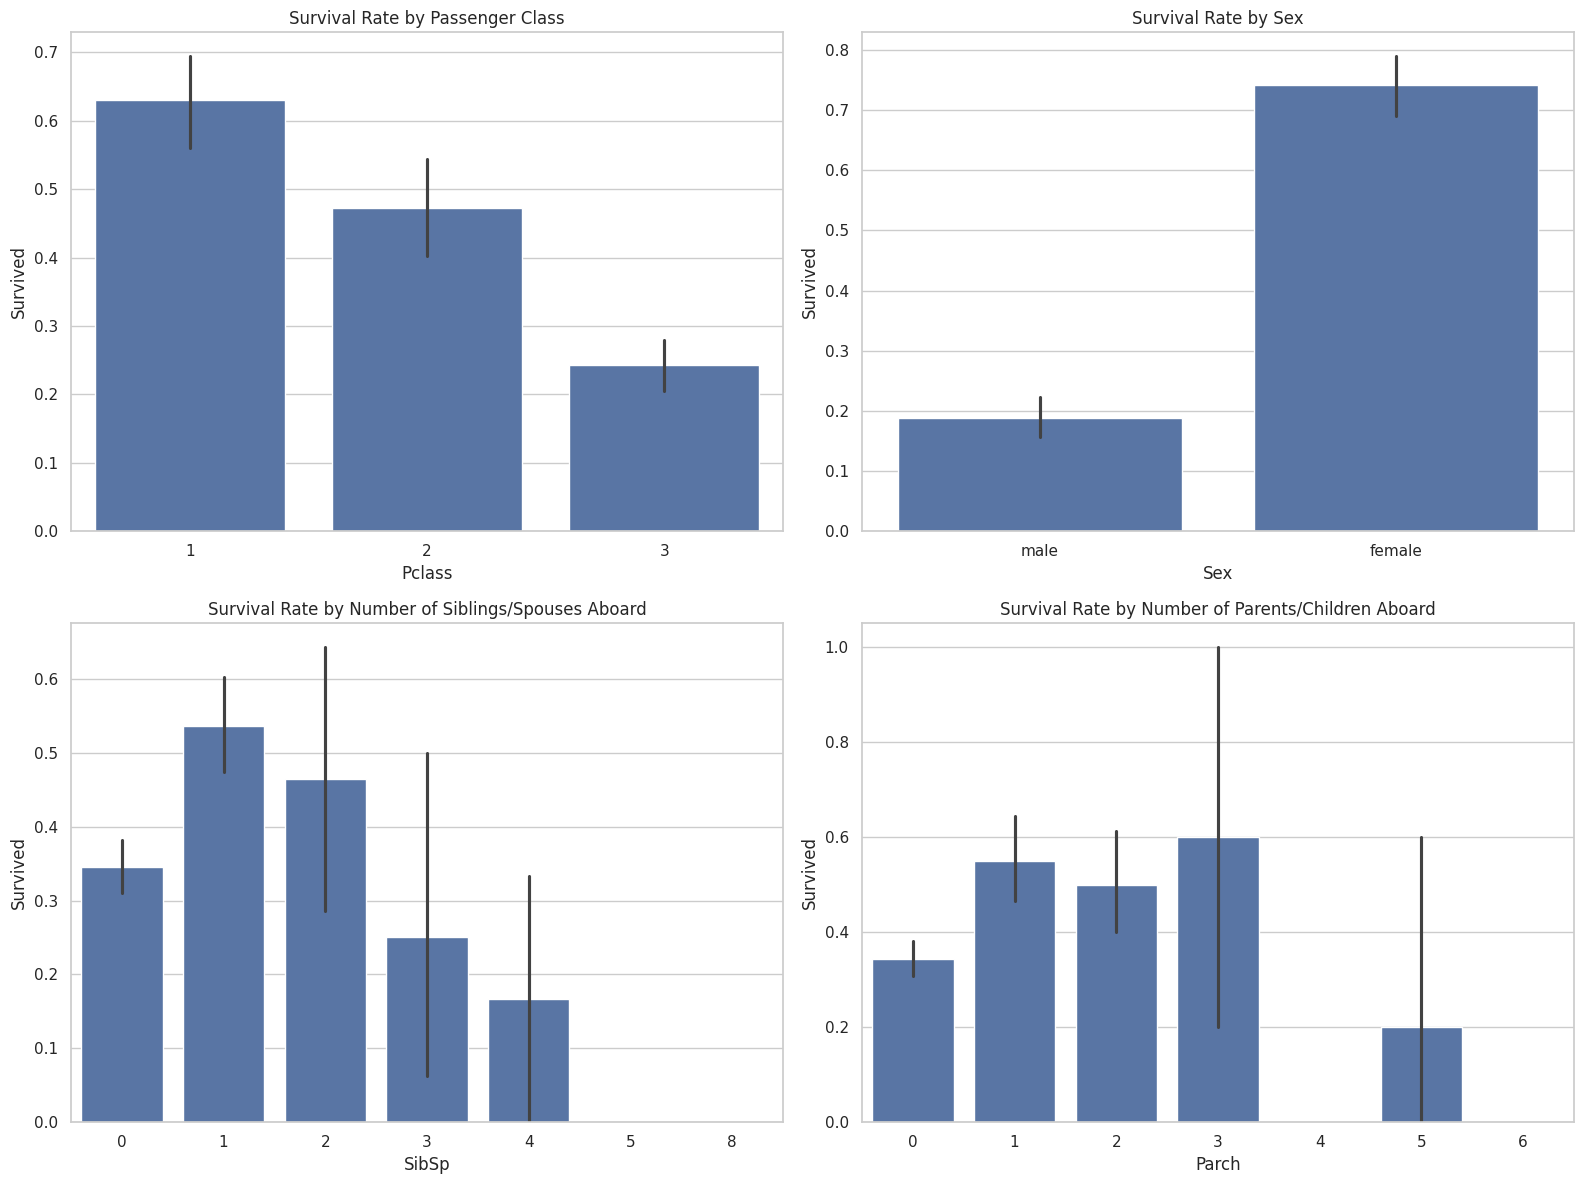

In [5]:
# Visualizations for deeper insights

fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# Survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=titanic_df, ax=ax[0, 0])
ax[0, 0].set_title('Survival Rate by Passenger Class')

# Survival rate by sex
sns.barplot(x='Sex', y='Survived', data=titanic_df, ax=ax[0, 1])
ax[0, 1].set_title('Survival Rate by Sex')

# Survival rate by having siblings/spouses aboard
sns.barplot(x='SibSp', y='Survived', data=titanic_df, ax=ax[1, 0])
ax[1, 0].set_title('Survival Rate by Number of Siblings/Spouses Aboard')

# Survival rate by having parents/children aboard
sns.barplot(x='Parch', y='Survived', data=titanic_df, ax=ax[1, 1])
ax[1, 1].set_title('Survival Rate by Number of Parents/Children Aboard')

plt.tight_layout()
plt.show()


# **Feature Engineering**

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encoding categorical variables
label_encoder = LabelEncoder()
titanic_df['Sex'] = label_encoder.fit_transform(titanic_df['Sex']) # Convert 'Sex' to numeric
titanic_df['Embarked'] = label_encoder.fit_transform(titanic_df['Embarked']) # Convert 'Embarked' to numeric

# Selecting features and target variable
X = titanic_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = titanic_df['Survived']


# **Dataset Splitting**

In [10]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Machine Learning Model Training**

In [11]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [12]:
# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:

# Predict on the testing set
y_pred = rf_model.predict(X_test)


In [14]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8212290502793296

In [16]:
from sklearn.metrics import classification_report
import pandas as pd

# Generating a classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)

# Converting the report to a DataFrame
report_df = pd.DataFrame(report_dict)

# Transposing the DataFrame for better readability
report_df_transposed = report_df.T

# Show the classification report in table form
report_df_transposed


,precision,recall,f1-score,support
0,0.828829,0.876190,0.851852,105.000000
1,0.808824,0.743243,0.774648,74.000000
accuracy,0.821229,0.821229,0.821229,0.821229
macro avg,0.818826,0.809717,0.813250,179.000000
weighted avg,0.820558,0.821229,0.819935,179.000000


# **Results Visualization**

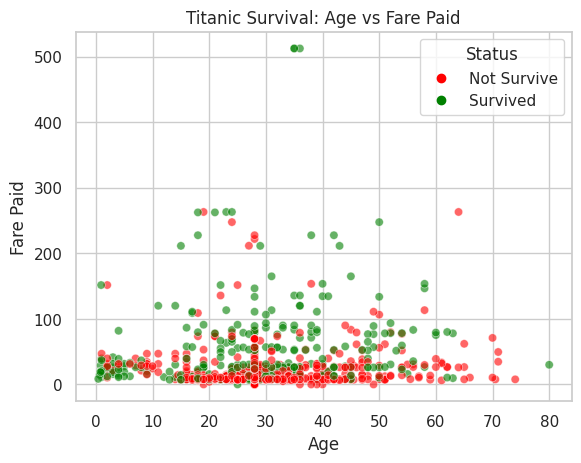

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot with specified palette for survival status
sns.scatterplot(data=titanic_df, x="Age", y="Fare", hue="Survived", palette={0: "red", 1: "green"}, alpha=0.6)

plt.title('Titanic Survival: Age vs Fare Paid')
plt.xlabel('Age')
plt.ylabel('Fare Paid')

# Manually setting the legend to reflect the desired labels and title
# The colors for the labels are aligned with the palette used in the scatterplot
plt.legend(title='Status', labels=['Not Survive', 'Survived'], handles=[plt.Line2D([], [], marker='o', linestyle='', color="red"),
                                                                        plt.Line2D([], [], marker='o', linestyle='', color="green")])

plt.show()
